# ライブラリ

In [201]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

# GPUの確認

In [202]:
device = (torch.device('cuda') if torch.cuda.is_available()
            else torch.device('cpu'))
device

device(type='cuda')

# CIFAR10のダウンロード

In [203]:
from torchvision import datasets, transforms
data_path = "./data"
cifar10 = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


# CIFAR10の仕様確認

In [204]:
len(cifar10), len(cifar10_val)

(50000, 10000)

In [205]:
cifar10.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

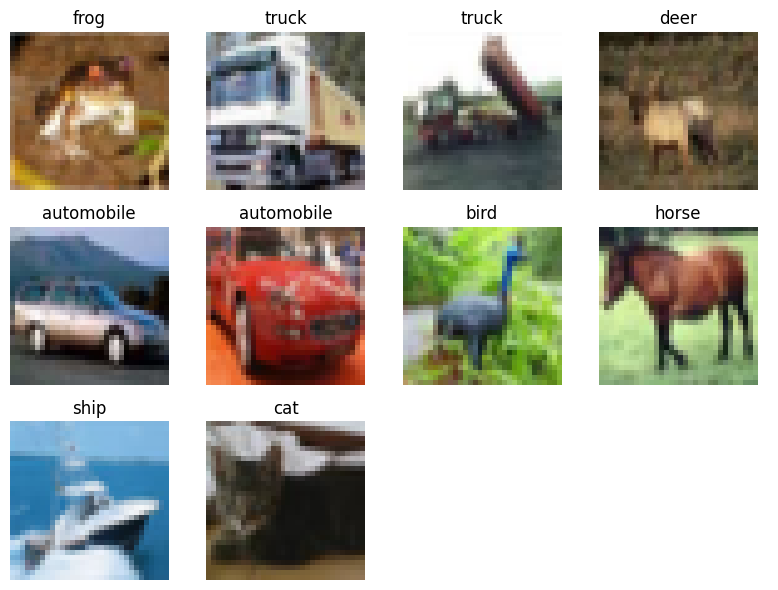

In [206]:
import math
num_images = 10
imgs, labels = [], []
for i in range(num_images):
    img, label = cifar10[i]
    imgs.append(img)
    labels.append(label)
cols = math.ceil(math.sqrt(num_images))
rows = math.ceil(num_images / cols)  

fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
axes = axes.flatten()

for i, (img, label) in enumerate(zip(imgs, labels)):
    axes[i].imshow(img.permute(1, 2, 0))
    axes[i].set_title(cifar10.classes[label])
    axes[i].axis('off')

for j in range(i + 1, rows * cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [207]:
cifar10[0][0].shape

torch.Size([3, 32, 32])

In [208]:
imgs = torch.stack([img for img, _ in cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [209]:
imgs.view(3, -1).mean(dim=1), imgs.view(3, -1).std(dim=1)

(tensor([0.4914, 0.4822, 0.4465]), tensor([0.2470, 0.2435, 0.2616]))

# 正規化

In [210]:
cifar10 = datasets.CIFAR10(data_path, train=True, download=False, 
                           transform=transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
                            ]))
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,
                                 transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
                             ]))

# モデル

In [211]:
import torch
import torch.nn as nn

In [212]:
class Model_2L(nn.Module):
    def __init__(self, learning_rate=1e-2, name="model_2L"):
        super(Model_2L, self).__init__()
        self.name = name
        self.network = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 10)
        )
        self.optimizer = torch.optim.SGD(self.parameters(), lr=learning_rate)
        self.loss_fn = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.network(x)

In [213]:
class Model_4L(nn.Module):
    def __init__(self, learning_rate=1e-2, name="model_4L"):
        super(Model_4L, self).__init__()
        self.name = name
        self.network = nn.Sequential(
            nn.Linear(3072, 2048),
            nn.Tanh(),
            nn.Linear(2048, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 10)
        )
        self.optimizer = torch.optim.SGD(self.parameters(), lr=learning_rate)
        self.loss_fn = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.network(x)

In [214]:
class Model_2L_BN(nn.Module):
    def __init__(self, learning_rate=1e-2, name="model_2L_BN"):
        super(Model_2L_BN, self).__init__()
        self.name = name
        self.network = nn.Sequential(
            nn.Linear(3072, 512),
            nn.BatchNorm1d(512),
            nn.Tanh(),
            nn.Linear(512, 10)
        )
        self.optimizer = torch.optim.SGD(self.parameters(), lr=learning_rate)
        self.loss_fn = nn.CrossEntropyLoss()
    def forward(self, x):
        return self.network(x)

In [215]:
class Model_4L_BN(nn.Module):
    def __init__(self, learning_rate=1e-2, name="model_4L_BN"):
        super(Model_4L_BN, self).__init__()
        self.name = name
        self.network = nn.Sequential(
            nn.Linear(3072, 2048),
            nn.BatchNorm1d(2048),
            nn.Tanh(),
            nn.Linear(2048, 1024),
            nn.BatchNorm1d(1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.Tanh(),
            nn.Linear(512, 10)
        )
        self.optimizer = torch.optim.SGD(self.parameters(), lr=learning_rate)
        self.loss_fn = nn.CrossEntropyLoss()
    def forward(self, x):
        return self.network(x)

In [216]:
class Model_4L_BN_DO_05(nn.Module):
    def __init__(self, learning_rate=1e-2, name="model_4L_BN_DO_05"):
        super(Model_4L_BN_DO_05, self).__init__()
        self.name = name
        self.network = nn.Sequential(
            nn.Linear(3072, 2048),
            nn.BatchNorm1d(2048),
            nn.Tanh(),
            nn.Dropout(0.5),
            nn.Linear(2048, 1024),
            nn.BatchNorm1d(1024),
            nn.Tanh(),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.Tanh(),
            nn.Dropout(0.5),
            nn.Linear(512, 10)
        )
        self.optimizer = torch.optim.SGD(self.parameters(), lr=learning_rate)
        self.loss_fn = nn.CrossEntropyLoss()
    def forward(self, x):
        return self.network(x)

In [217]:
class Model_4L_BN_L2_1e_4(nn.Module):
    def __init__(self, learning_rate=1e-2, name="model_4L_BN_L2_1e_4"):
        super(Model_4L_BN_L2_1e_4, self).__init__()
        self.name = name
        self.network = nn.Sequential(
            nn.Linear(3072, 2048),
            nn.BatchNorm1d(2048),
            nn.Tanh(),
            nn.Linear(2048, 1024),
            nn.BatchNorm1d(1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.Tanh(),
            nn.Linear(512, 10)
        )
        self.optimizer = torch.optim.SGD(self.parameters(), lr=learning_rate)
        self.loss_fn = nn.CrossEntropyLoss()
    def forward(self, x):
        return self.network(x)

In [218]:
class Model_Conv_4L(nn.Module):
    def __init__(self, learning_rate=1e-2, name="model_Conv_4L"):
        super(Model_Conv_4L, self).__init__()
        self.name = name
        self.network = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(8 * 8 * 8, 32),
            nn.Tanh(),
            nn.Linear(32, 10)
        )
        self.optimizer = torch.optim.SGD(self.parameters(), lr=learning_rate)
        self.loss_fn = nn.CrossEntropyLoss()
    def forward(self, x):
        return self.network(x)

In [230]:
class Model_Conv_4L_BN(nn.Module):
    def __init__(self, learning_rate=1e-2, name="model_Conv_4L_BN"):
        super(Model_Conv_4L_BN, self).__init__()
        self.name = name
        self.network = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.BatchNorm2d(8),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(8 * 8 * 8, 32),
            nn.BatchNorm1d(32),
            nn.Tanh(),
            nn.Linear(32, 10)
        )
        self.optimizer = torch.optim.SGD(self.parameters(), lr=learning_rate)
        self.loss_fn = nn.CrossEntropyLoss()
    
    def forward(self, x):
        return self.network(x)

# 学習

In [219]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)

In [220]:
def train_model(model, n_epochs, is_conv=False):
    losses = []
    for epoch in range(n_epochs):
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            if is_conv:
                outputs = model(imgs)
            else:
                outputs = model(imgs.view(imgs.shape[0], -1))
            loss = model.loss_fn(outputs, labels.to(device=device))
            model.optimizer.zero_grad()
            loss.backward()
            model.optimizer.step()
        
        losses.append(float(loss))
        print(f"Epoch {epoch}, Loss {float(loss)}")
    return losses

In [221]:
model_2L = Model_2L()
model_2L.to(device=device)
n_epochs_2L = 100
losses_2L = train_model(model_2L, n_epochs_2L, is_conv=False)

Epoch 0, Loss 1.8393231630325317
Epoch 1, Loss 1.377354621887207
Epoch 2, Loss 1.992598056793213
Epoch 3, Loss 1.2991199493408203
Epoch 4, Loss 1.6469547748565674
Epoch 5, Loss 1.1769356727600098
Epoch 6, Loss 1.235960602760315
Epoch 7, Loss 1.3309745788574219
Epoch 8, Loss 2.0593605041503906
Epoch 9, Loss 1.0380967855453491
Epoch 10, Loss 1.2320199012756348
Epoch 11, Loss 1.3290818929672241
Epoch 12, Loss 1.2253364324569702
Epoch 13, Loss 1.4846980571746826
Epoch 14, Loss 0.8920115828514099
Epoch 15, Loss 1.1684494018554688
Epoch 16, Loss 1.1214113235473633
Epoch 17, Loss 1.3533624410629272
Epoch 18, Loss 0.6674745678901672
Epoch 19, Loss 1.1560454368591309
Epoch 20, Loss 1.208069920539856
Epoch 21, Loss 1.132025957107544
Epoch 22, Loss 1.019705891609192
Epoch 23, Loss 0.9856096506118774
Epoch 24, Loss 0.9310532808303833
Epoch 25, Loss 1.080420732498169
Epoch 26, Loss 0.9732165336608887
Epoch 27, Loss 0.6964455842971802
Epoch 28, Loss 0.75641268491745
Epoch 29, Loss 0.7549652457237244

In [222]:
model_4L = Model_4L()
model_4L.to(device=device)
n_epochs_4L = 100
losses_4L = train_model(model_4L, n_epochs_4L, is_conv=False)

Epoch 0, Loss 1.7532234191894531
Epoch 1, Loss 1.6203703880310059
Epoch 2, Loss 2.0412631034851074
Epoch 3, Loss 1.8207381963729858
Epoch 4, Loss 1.630635142326355
Epoch 5, Loss 1.6498782634735107
Epoch 6, Loss 1.3613706827163696
Epoch 7, Loss 1.2936980724334717
Epoch 8, Loss 1.5922112464904785
Epoch 9, Loss 1.5027625560760498
Epoch 10, Loss 1.174729347229004
Epoch 11, Loss 1.7786487340927124
Epoch 12, Loss 1.4180347919464111
Epoch 13, Loss 1.1552002429962158
Epoch 14, Loss 1.6506973505020142
Epoch 15, Loss 0.8073364496231079
Epoch 16, Loss 1.29922616481781
Epoch 17, Loss 1.1136637926101685
Epoch 18, Loss 1.4016268253326416
Epoch 19, Loss 0.9788170456886292
Epoch 20, Loss 0.6663133502006531
Epoch 21, Loss 0.960906445980072
Epoch 22, Loss 0.9439793825149536
Epoch 23, Loss 0.8155426979064941
Epoch 24, Loss 0.5837269425392151
Epoch 25, Loss 1.3874635696411133
Epoch 26, Loss 0.3987647593021393
Epoch 27, Loss 0.5475894212722778
Epoch 28, Loss 0.6981391310691833
Epoch 29, Loss 0.709354519844

In [223]:
model_2L_BN = Model_2L_BN()
model_2L_BN.to(device=device)
n_epochs_2L_BN = 100
losses_2L_BN = train_model(model_2L_BN, n_epochs_2L_BN, is_conv=False)

Epoch 0, Loss 2.1872620582580566
Epoch 1, Loss 1.9993709325790405
Epoch 2, Loss 1.6268388032913208
Epoch 3, Loss 1.3382768630981445
Epoch 4, Loss 1.0836219787597656
Epoch 5, Loss 1.6949337720870972
Epoch 6, Loss 1.4532034397125244
Epoch 7, Loss 1.6310747861862183
Epoch 8, Loss 1.4053863286972046
Epoch 9, Loss 1.2073763608932495
Epoch 10, Loss 1.5619040727615356
Epoch 11, Loss 1.3442074060440063
Epoch 12, Loss 1.655006766319275
Epoch 13, Loss 0.9151168465614319
Epoch 14, Loss 1.2963725328445435
Epoch 15, Loss 1.6424057483673096
Epoch 16, Loss 1.0146738290786743
Epoch 17, Loss 0.9626743793487549
Epoch 18, Loss 1.0382115840911865
Epoch 19, Loss 1.8998727798461914
Epoch 20, Loss 1.376372218132019
Epoch 21, Loss 1.1805636882781982
Epoch 22, Loss 1.1252840757369995
Epoch 23, Loss 1.2672488689422607
Epoch 24, Loss 1.2072309255599976
Epoch 25, Loss 0.9766004681587219
Epoch 26, Loss 1.0298206806182861
Epoch 27, Loss 1.3487385511398315
Epoch 28, Loss 1.1112120151519775
Epoch 29, Loss 0.687257409

In [224]:
model_4L_BN = Model_4L_BN()
model_4L_BN.to(device=device)
n_epochs_4L_BN = 100
losses_4L_BN = train_model(model_4L_BN, n_epochs_4L_BN, is_conv=False)

Epoch 0, Loss 2.604440689086914
Epoch 1, Loss 1.8270983695983887
Epoch 2, Loss 1.8805673122406006
Epoch 3, Loss 1.7525744438171387
Epoch 4, Loss 1.4772462844848633
Epoch 5, Loss 1.3781510591506958
Epoch 6, Loss 0.6501259803771973
Epoch 7, Loss 0.941506028175354
Epoch 8, Loss 0.9767621755599976
Epoch 9, Loss 1.4359058141708374
Epoch 10, Loss 1.76924729347229
Epoch 11, Loss 0.82602459192276
Epoch 12, Loss 0.9010181427001953
Epoch 13, Loss 1.2272038459777832
Epoch 14, Loss 1.0060316324234009
Epoch 15, Loss 0.7614679336547852
Epoch 16, Loss 1.0819625854492188
Epoch 17, Loss 0.7306827902793884
Epoch 18, Loss 0.8573583364486694
Epoch 19, Loss 0.5336142182350159
Epoch 20, Loss 0.7165355682373047
Epoch 21, Loss 0.3055676221847534
Epoch 22, Loss 0.25277331471443176
Epoch 23, Loss 0.7050466537475586
Epoch 24, Loss 0.7469540238380432
Epoch 25, Loss 0.8930435180664062
Epoch 26, Loss 1.1083498001098633
Epoch 27, Loss 0.466462105512619
Epoch 28, Loss 0.83958899974823
Epoch 29, Loss 0.420064151287078

In [225]:
model_4L_BN_DO_05 = Model_4L_BN_DO_05()
model_4L_BN_DO_05.to(device=device)
n_epochs_4L_BN_DO_05 = 100
losses_4L_BN_DO_05 = train_model(model_4L_BN_DO_05, n_epochs_4L_BN_DO_05, is_conv=False)

Epoch 0, Loss 1.6852037906646729
Epoch 1, Loss 1.5039006471633911
Epoch 2, Loss 1.5876479148864746
Epoch 3, Loss 2.2258222103118896
Epoch 4, Loss 1.777664303779602
Epoch 5, Loss 2.1121413707733154
Epoch 6, Loss 1.9094449281692505
Epoch 7, Loss 2.0003199577331543
Epoch 8, Loss 1.3093249797821045
Epoch 9, Loss 1.2153732776641846
Epoch 10, Loss 1.689987301826477
Epoch 11, Loss 1.6279540061950684
Epoch 12, Loss 1.5132585763931274
Epoch 13, Loss 1.6937507390975952
Epoch 14, Loss 1.8205008506774902
Epoch 15, Loss 1.5590574741363525
Epoch 16, Loss 1.57183039188385
Epoch 17, Loss 1.4593360424041748
Epoch 18, Loss 1.486142635345459
Epoch 19, Loss 2.3676578998565674
Epoch 20, Loss 1.7266143560409546
Epoch 21, Loss 1.5474427938461304
Epoch 22, Loss 1.9415687322616577
Epoch 23, Loss 1.5395262241363525
Epoch 24, Loss 1.4027291536331177
Epoch 25, Loss 1.6166952848434448
Epoch 26, Loss 1.454435110092163
Epoch 27, Loss 1.5927467346191406
Epoch 28, Loss 1.3634788990020752
Epoch 29, Loss 1.5768761634826

In [226]:
model_4L_BN_L2_1e_4 = Model_4L_BN_L2_1e_4()
model_4L_BN_L2_1e_4.to(device=device)
n_epochs_4L_BN_L2_1e_4 = 100
losses_4L_BN_L2_1e_4 = train_model(model_4L_BN_L2_1e_4, n_epochs_4L_BN_L2_1e_4, is_conv=False)

Epoch 0, Loss 1.9387445449829102
Epoch 1, Loss 1.2631899118423462
Epoch 2, Loss 1.8648258447647095
Epoch 3, Loss 1.1601669788360596
Epoch 4, Loss 1.8889622688293457
Epoch 5, Loss 1.9000005722045898
Epoch 6, Loss 1.6009875535964966
Epoch 7, Loss 1.5220354795455933
Epoch 8, Loss 1.2442330121994019
Epoch 9, Loss 1.5102887153625488
Epoch 10, Loss 1.3740153312683105
Epoch 11, Loss 0.853327751159668
Epoch 12, Loss 0.6717106103897095
Epoch 13, Loss 1.2062981128692627
Epoch 14, Loss 0.8011462688446045
Epoch 15, Loss 1.1143769025802612
Epoch 16, Loss 0.4597618281841278
Epoch 17, Loss 1.7969841957092285
Epoch 18, Loss 0.513249397277832
Epoch 19, Loss 0.9485570788383484
Epoch 20, Loss 0.6063089966773987
Epoch 21, Loss 1.0654445886611938
Epoch 22, Loss 0.8190146088600159
Epoch 23, Loss 0.8422760367393494
Epoch 24, Loss 0.5780203938484192
Epoch 25, Loss 0.7703887224197388
Epoch 26, Loss 0.27366355061531067
Epoch 27, Loss 0.4847075045108795
Epoch 28, Loss 0.2913784980773926
Epoch 29, Loss 0.35494822

In [227]:
model_Conv_4L = Model_Conv_4L()
model_Conv_4L.to(device=device)
n_epochs_Conv_4L= 100
losses_Conv_4L = train_model(model_Conv_4L, n_epochs_Conv_4L, is_conv=True)

Epoch 0, Loss 1.8204982280731201
Epoch 1, Loss 1.635459303855896
Epoch 2, Loss 1.5370845794677734
Epoch 3, Loss 1.4518336057662964
Epoch 4, Loss 1.3849660158157349
Epoch 5, Loss 1.5840030908584595
Epoch 6, Loss 1.3269299268722534
Epoch 7, Loss 1.2533267736434937
Epoch 8, Loss 1.346949577331543
Epoch 9, Loss 1.1410071849822998
Epoch 10, Loss 1.859599232673645
Epoch 11, Loss 0.9803735613822937
Epoch 12, Loss 1.0318171977996826
Epoch 13, Loss 1.1740025281906128
Epoch 14, Loss 0.5774983763694763
Epoch 15, Loss 1.2625101804733276
Epoch 16, Loss 0.7950409650802612
Epoch 17, Loss 0.8161332011222839
Epoch 18, Loss 0.8384540677070618
Epoch 19, Loss 1.0953789949417114
Epoch 20, Loss 0.8433526158332825
Epoch 21, Loss 1.2400356531143188
Epoch 22, Loss 0.5101690292358398
Epoch 23, Loss 0.7781578898429871
Epoch 24, Loss 0.5787807703018188
Epoch 25, Loss 1.6165002584457397
Epoch 26, Loss 0.9011728167533875
Epoch 27, Loss 0.4586585462093353
Epoch 28, Loss 0.782856822013855
Epoch 29, Loss 0.72197437286

In [231]:
model_Conv_4L_BN = Model_Conv_4L_BN()
model_Conv_4L_BN.to(device=device)
n_epochs_Conv_4L_BN= 100
losses_Conv_4L_BN = train_model(model_Conv_4L_BN, n_epochs_Conv_4L_BN, is_conv=True)

Epoch 0, Loss 1.327715516090393
Epoch 1, Loss 1.64467453956604
Epoch 2, Loss 1.6109158992767334
Epoch 3, Loss 1.0362297296524048
Epoch 4, Loss 1.4691466093063354
Epoch 5, Loss 1.2363065481185913
Epoch 6, Loss 1.1089398860931396
Epoch 7, Loss 0.6769213080406189
Epoch 8, Loss 1.2403554916381836
Epoch 9, Loss 1.4403421878814697
Epoch 10, Loss 1.3604278564453125
Epoch 11, Loss 0.8177194595336914
Epoch 12, Loss 1.388748049736023
Epoch 13, Loss 0.9739803671836853
Epoch 14, Loss 1.051061749458313
Epoch 15, Loss 1.1910066604614258
Epoch 16, Loss 1.1105890274047852
Epoch 17, Loss 1.0110254287719727
Epoch 18, Loss 1.1215089559555054
Epoch 19, Loss 0.9764626622200012
Epoch 20, Loss 0.6049556136131287
Epoch 21, Loss 1.0098357200622559
Epoch 22, Loss 1.141454815864563
Epoch 23, Loss 0.9781070351600647
Epoch 24, Loss 0.4022666811943054
Epoch 25, Loss 1.1637669801712036
Epoch 26, Loss 0.653046727180481
Epoch 27, Loss 0.39799079298973083
Epoch 28, Loss 0.7203775644302368
Epoch 29, Loss 1.2038280963897

# 結果

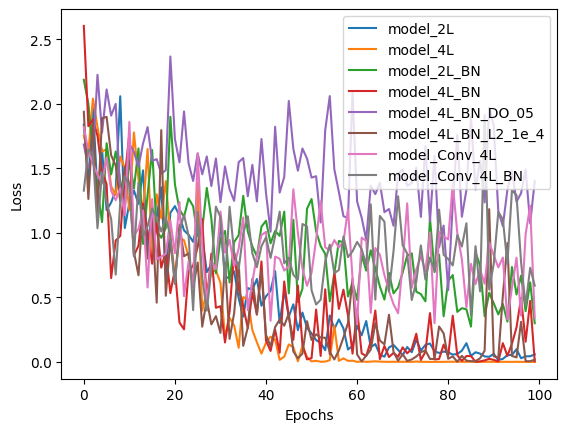

In [232]:
fig, ax = plt.subplots()
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.plot(range(n_epochs_2L), losses_2L, label='model_2L')
ax.plot(range(n_epochs_4L), losses_4L, label='model_4L')
ax.plot(range(n_epochs_2L_BN), losses_2L_BN, label='model_2L_BN')
ax.plot(range(n_epochs_4L_BN), losses_4L_BN, label='model_4L_BN')
ax.plot(range(n_epochs_4L_BN_DO_05), losses_4L_BN_DO_05, label='model_4L_BN_DO_05')
ax.plot(range(n_epochs_4L_BN_L2_1e_4), losses_4L_BN_L2_1e_4, label='model_4L_BN_L2_1e_4')
ax.plot(range(n_epochs_Conv_4L), losses_Conv_4L, label='model_Conv_4L')
ax.plot(range(n_epochs_Conv_4L_BN), losses_Conv_4L_BN, label='model_Conv_4L_BN')
ax.legend(loc='best')
plt.show()

In [233]:
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64, shuffle=False)

In [234]:
def evaluate_accuracy(model, is_conv=False):
    model_name = getattr(model, 'name', model.__class__.__name__)
    with torch.no_grad():
        correct = 0
        total = 0
        for imgs, labels in val_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            if is_conv:
                outputs = model(imgs)
            else:
                outputs = model(imgs.view(imgs.shape[0], -1))
            _, predicted = torch.max(outputs, dim=1)
            total += labels.shape[0]
            correct += int((predicted == labels).sum())
        accuracy = correct / total
        print(f'{model_name} val_Accuracy: {accuracy}')

        correct = 0
        total = 0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            if is_conv:
                outputs = model(imgs)
            else:
                outputs = model(imgs.view(imgs.shape[0], -1))
            _, predicted = torch.max(outputs, dim=1)
            total += labels.shape[0]
            correct += int((predicted == labels).sum())
        accuracy = correct / total
        print(f'{model_name} train_Accuracy: {accuracy}')

In [235]:
evaluate_accuracy(model_2L, is_conv=False)

model_2L val_Accuracy: 0.4691
model_2L train_Accuracy: 0.99934


In [236]:
evaluate_accuracy(model_4L, is_conv=False)

model_4L val_Accuracy: 0.4871
model_4L train_Accuracy: 1.0


In [237]:
evaluate_accuracy(model_2L_BN, is_conv=False)

model_2L_BN val_Accuracy: 0.4214
model_2L_BN train_Accuracy: 0.83952


In [238]:
evaluate_accuracy(model_4L_BN, is_conv=False)

model_4L_BN val_Accuracy: 0.507
model_4L_BN train_Accuracy: 0.99922


In [239]:
evaluate_accuracy(model_4L_BN_DO_05, is_conv=False)

model_4L_BN_DO_05 val_Accuracy: 0.454
model_4L_BN_DO_05 train_Accuracy: 0.6086


In [240]:
evaluate_accuracy(model_4L_BN_L2_1e_4, is_conv=False)

model_4L_BN_L2_1e_4 val_Accuracy: 0.4909
model_4L_BN_L2_1e_4 train_Accuracy: 0.98506


In [241]:
evaluate_accuracy(model_Conv_4L, is_conv=True)

model_Conv_4L val_Accuracy: 0.6612
model_Conv_4L train_Accuracy: 0.7625


In [242]:
evaluate_accuracy(model_Conv_4L_BN, is_conv=True)

model_Conv_4L_BN val_Accuracy: 0.6494
model_Conv_4L_BN train_Accuracy: 0.77922
